<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/naiveBayesGradjoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, accuracy_score

IMPORT DATASET AND VIEW

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/joezerr/nbacceptance/main/dataset.csv')
df.head(6)

,gmat,gpa,work experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gmat              40 non-null     int64  
 1   gpa               40 non-null     float64
 2   work  experience  40 non-null     int64  
 3   admitted          40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


SPLIT DATASET

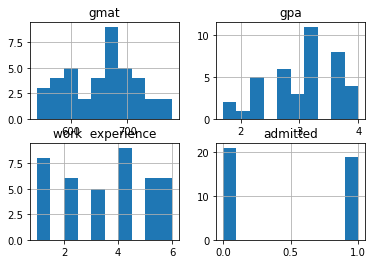

In [ ]:
df.hist()
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

In [ ]:
X = df.drop('admitted', axis=1)
X.head()

,gmat,gpa,work experience
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [ ]:
y = df[['admitted']]

In [ ]:
y.head()

,admitted
0,1
1,1
2,0
3,1
4,0


In [ ]:
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
print(f'Train data shape: {X_train.shape}')
print(f'Test data shape: {X_tst.shape}')

Train data shape: (30, 3)
Test data shape: (10, 3)


VISUALIZE THE DATASET

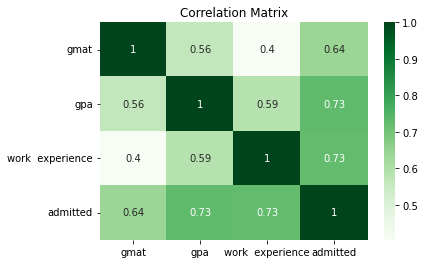

In [ ]:
sns.heatmap(data=df.corr(),annot=True, cmap='Greens')
plt.title("Correlation Matrix")
plt.show()

NORMALIZE THE DATASET

In [ ]:
normalize = MinMaxScaler()
scaled_X_train = pd.DataFrame(normalize.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
scaled_X_valid = pd.DataFrame(normalize.transform(X_tst), columns=X_tst.columns, index=X_tst.index)
scaled_X_train.head()

,gmat,gpa,work experience
5,0.826087,0.869565,1.0
23,0.043478,0.434783,0.0
18,0.000000,0.434783,0.2
12,0.739130,0.869565,1.0
31,0.347826,0.434783,0.2


In [ ]:
class naive_bayes:
  def __init__(self):
    pass

  def fit(self, X, y):
    self.meanNStd = {}
    self._var = {}
    self.cpProb = {}

    for col in X.columns:
      self.meanNStd[col] = {}
      self._var[col] = {}

    data = pd.concat([X, y], axis=1)
    data = data.sort_values(by=['admitted'])
    self.n_classes = y['admitted'].unique()

    split_data = {}
    for cls in self.n_classes:
      split_data[cls] = data[data['admitted'] == cls].loc[:, data.columns != 'admitted']

    for i in split_data:
      for j in split_data[i]:
        self.meanNStd[j][i] = split_data[i][j].mean()
        self._var[j][i] = split_data[i][j].var()

    for cls in self.n_classes:
      self.cpProb[cls] = len(split_data[cls]) / len(data)

  def predict(self, X):
    prds = []
    for i in range(len(X)):
      _posteriors = np.array([])
      
      for cls in self.n_classes:
        posterior = 1
        
        for col in X.columns:
          value = X.iloc[i][col]
          mean = self.meanNStd[col][cls]
          var = self._var[col][cls]
          fx = (1 / (np.sqrt(2 * np.pi) * (np.sqrt(var)))) * np.exp(-1 * ((value - mean) ** 2 / (2 * var)))
          posterior *= fx
        _posteriors = np.append(_posteriors, posterior)

      prds.append(self.n_classes[np.argmax(_posteriors)])
      
    return prds

In [ ]:
model = naive_bayes()
model.fit(scaled_X_train, y_train)

In [ ]:
def score():
  right=0
  wrong=0
  for i in range(len(y_pred)):
    if(y_pred[i]==y_train[i]):
      right= right+1
    else :wrong= wrong +1

  print(right/wrong)

PREDICTION USING TRAINING DATASET

In [ ]:
y_pred = model.predict(scaled_X_valid)
y_pred

[0, 0, 1, 0, 1, 0, 1, 1, 1, 0]

In [ ]:
y_val_true = y_tst['admitted']
temp = pd.DataFrame({
    'y_pred': y_pred,
    'y_true': y_val_true
})

pd.concat([scaled_X_valid, temp], axis=1)

,gmat,gpa,work experience,y_pred,y_true
15,0.304348,0.565217,0.0,0,0
27,0.173913,0.260870,0.2,0,0
25,0.565217,0.695652,1.0,1,1
16,0.173913,0.434783,0.6,0,0
17,0.478261,0.869565,1.0,1,1
37,0.173913,0.695652,0.0,0,0
8,0.869565,0.695652,0.8,1,1
0,1.043478,1.000000,0.4,1,1
1,0.913043,0.956522,0.6,1,1
21,0.260870,0.130435,0.0,0,0


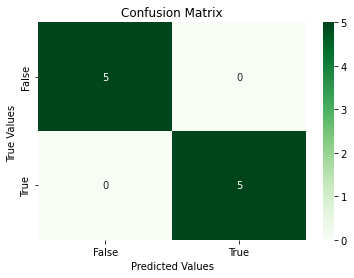

In [ ]:
cf_matrix = confusion_matrix(y_val_true, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
print('Accuracy score:', accuracy_score(y_val_true, y_pred))
print('Precision score:', precision_score(y_val_true, y_pred))
print('Recall score:', recall_score(y_val_true, y_pred))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0


In [ ]:
print(classification_report(y_val_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Naive bayesian model yang telah dibuat menunjukan hasil yang cukup akurat sehingga menghasilkan output yang benar, oleh karena itu, gunakan model yang sama untuk test data. 

In [ ]:
X_test = pd.read_csv('https://raw.githubusercontent.com/joezerr/nbacceptance/main/testdata.csv')
X_test.shape

X_test.columns = X_train.columns
scaled_X_test = pd.DataFrame(normalize.transform(X_test), columns=X_test.columns)

In [ ]:
y_test_pred = model.predict(scaled_X_test)
y_test_pred

[0, 1, 1, 0, 1]

In [ ]:
result = pd.concat([scaled_X_test, pd.Series(y_test_pred, name='y_pred')], axis=1)
result

,gmat,gpa,work experience,y_pred
0,0.217391,0.130435,0.4,0
1,0.869565,0.869565,0.6,1
2,0.608696,0.695652,1.0,1
3,0.304348,0.260870,0.0,0
4,0.739130,0.565217,0.8,1
